# 탐색적 데이터 분석
* EDA(Exploratory Data Analysis)
* 도표나 차트로 표현
* 숫자(통계량)로 표현

---

## 기술통계량

* **데이터의 특징을 요약/기술하는 통계량**
* **위치 통계량(measure of location)**
    * 데이터의 중심 위치를 나타내는 척도(대표값)
    * 평균, 중위수, 절사평균, 최빈수, 사분위수 등


* **변이 통계량(measure of dispersion)**
    * 데이터의 퍼짐, 흩어짐(산포도)
    * 표준편차, 분산, 사분위간 범위 등


* **모양 통계량(measure of shape)**
    * 왜도
        * 중심 위치로부터 어느 한쪽으로 치우친 정도
    * 첨도
        * 분포의 뾰족한 정도

In [1]:
import numpy as np
import pandas as pd
import math
from scipy.stats import *
import scipy as sp

# Jupyter Notebook의 출력을 소수점 이하 3자리로 제한
%precision 3
# Dataframe의 출력을 소수점 이하 3자리로 제한
pd.set_option('precision', 3)

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

* 참고
    * scipy.stats : [https://docs.scipy.org/doc/scipy/reference/stats.html
](https://docs.scipy.org/doc/scipy/reference/stats.html
)
    * numpy  statistics : [https://numpy.org/doc/stable/reference/routines.statistics.html
](https://numpy.org/doc/stable/reference/routines.statistics.html
)
    * math : [https://docs.python.org/ko/3/library/math.html#number-theoretic-and-representation-functions
](https://docs.python.org/ko/3/library/math.html#number-theoretic-and-representation-functions
)


---

### 1. 위치 통계량(location)
* 중심 경향성

#### 평균(mean)
* 가장 많이 사용되는 대표값
    * 모든 데이터의 합을 데이터의 개수로 나눈 값(산술평균)
* 계산이 쉬움, 수학적으로 활용 편리, 각 자료에 대한 유일한 값을 가짐
* 분산의 계산, 모수 추정, 가설 검정 등 통계분석의 대표적인 통계량으로 널리 사용
* 데이터에 극단적인 값 포함되면 평균이 왜곡되는 경향이 있다.그런 경우 대표값으로

##### 산술평균(arithmetic mean)

In [3]:
x = [1,2,3,4,5]
np.mean(x)
np.array(x).mean()
pd.Series(x).mean()

3.0

3.0

3.000

In [4]:
# 누구나 파이썬 통계분석 p.31
df = pd.read_csv('./data/ch2_scores_em.csv',
                index_col = 'student number')
df.head()

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


In [5]:
df.shape # 50행 2열

(50, 2)

In [6]:
# sum(), len()를 이용한 산술평균
# 영어 과목의 평균
sum(df['english'])/len(df['english'])

58.380

In [7]:
# numpy
np.mean(df['english'])

58.380

In [8]:
# pandas
df['english'].mean()

58.380

In [9]:
# scipy
sp.mean(df['english'])

<ipython-input-9-2043e7dc93a5>:2: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  sp.mean(df['english'])


58.380

##### 기하평균
* n개의 양수 값을 모두 곱한 것의 n 제곱근
* 성장률의 평균
* 예) 1차년도에 200%, 2차년도에 800%, 3차년도에 300% 성장을 했다면 3개년도 연 평균 성장률은?

In [10]:
data = [2,8,3]

In [11]:
# 산술평균
np.mean(data) # 433%

4.333333333333333

In [12]:
# 기하평균 math.prod(data) = 데이터들을 다 곱해줌
math.prod(data)**(1/len(data))

3.634

In [13]:
# scipy.stat.gmean(a[, axis, dtype, weights]) 이용 기하평균
gmean(data)

3.634241185664279

##### 조화평균
* 비율 및 변화율에 대한 평균을 계산할 때 사용
* 예시) 100km 떨어진 도시까지 차로 다녀오면서 가는길에는 시속 80km 오는길은 시속 120km로 달렸을때 평균 속력은?

In [14]:
# 조화평균 계산
data = np.array([80, 120])
1/data
len(data)/np.sum(1/data)

array([0.013, 0.008])

95.99999999999999

In [15]:
# scipy.stat.hmean(a[, axis, dtype]) 이용 조화평균
hmean(data)

95.99999999999999

#### 가중평균(비중)

In [16]:
# numpy.average 이용 가중평균
np.mean(np.arange(1,11)) # 산술
np.average(np.arange(1,11))
np.average(np.arange(1,11), weights=np.arange(10, 0, -1))

5.5

5.5

4.0

##### 중앙값(median)
* 중위수, 중간값
* 데이터를 크기 순서대로 나열할 때 가운데 위치하는 수
* 데이터의 개수가 홀수일 경우 : 가운데 위치하는 유일한 숫자
* 짝수일 경우 : 가운데 위치하는 2가지 수으 평균값
* 극단적인 값에 영향X
* 가운데 위치하는 한 두개의 데이터만으로 계산
* 극단적인 값이 포함된 데이터의 대표값 비교

In [17]:
# 예제 데이터
scores = np.array(df['english'])
scores


array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58, 70, 47, 51, 64, 62, 70, 71,
       68, 73, 37, 65, 65, 61, 52, 57, 57, 75, 61, 47, 54, 66, 54, 54, 42,
       37, 79, 56, 62, 62, 55, 63, 57, 57, 67, 55, 45, 66, 55, 64, 66],
      dtype=int64)

In [18]:
# 순서 통계량
sorted_scores = np.sort(scores)
sorted_scores

array([37, 37, 41, 42, 42, 45, 47, 47, 48, 49, 51, 52, 54, 54, 54, 55, 55,
       55, 56, 56, 57, 57, 57, 57, 57, 58, 61, 61, 62, 62, 62, 63, 64, 64,
       65, 65, 65, 65, 66, 66, 66, 67, 68, 69, 70, 70, 71, 73, 75, 79],
      dtype=int64)

In [19]:
# median 계산식
n = len(sorted_scores)
if n%2 == 0:
    x1 = sorted_scores[n//2-1]
    x2 = sorted_scores[n//2]
    median = (x1+x2)/2
else:
    median = sorted_scores[(n+1)//2-1]

median

57.5

In [20]:
sorted_scores[24], sorted_scores[25]

(57, 58)

In [21]:
# numpy의 median() 함수
np.median(scores)
# pandas.DataFrame median
df['english'].median()

57.5

57.500

##### 절사 평균(trimmed mean)
* 평균의 장점과 중앙값의 장점을 갖는 대표값
* 절사비율(%)
    * 전체 데이터의 개수에 대해 몇 %의 데이터 (상위+하위)를 배제할 것인가 결정

예시) 평균이 2백만원, 표준편차 50만원인 정규 분포를 따르는 소득 데이터 100개 생성

In [22]:
np.random.seed(3)
income = np.random.normal(2000000, 500000, 100)
income[:10]

array([2894314.237, 2218254.925, 2048248.734, 1068253.648, 1861305.899,
       1822620.51 , 1958629.259, 1686499.662, 1978090.916, 1761390.985])

In [23]:
# 평균 소득
np.mean(income)

1945681.4627969689

소득이 10억인 사람 추가

In [24]:
income = np.append(income, 10**9)

In [25]:
# 평균 소득
np.mean(income)

11827407.38890789

In [26]:
# 중앙값
np.median(income)

1919743.318406538

In [27]:
# scipy.stats.trim_mean(a, proportioncut[, axis]) 이용
trim_mean(income, 0.2)

1941471.0812132563

---

#### 최빈값(mode)

* 자료 중 가장 자주 나타타는(빈도가 갖아 많은) 고나측치
    * 평균, 중위수와 달리 자료에 따라 존재하지 않을수도, 유일한 값이 아닐수도
    * 질적 변수에도 활용
* 중앙값과 최빈값의 특징
    * 자료의 분포가 비대칭인 경우 평균의 보조자료로 사용
    * 개방 구간을 갖는 도수분포표의 경우 중앙값 또는 최빈값을 대표값으로 사용

##### 최빈값 계산
* 한 변수가 가장 많이 취한 값
* 범주형 변수에 대해서만 적용

In [28]:
np.random.seed(3)
data = np.random.choice(['A','B','C'], 1000)
# A, B, C라는 요소로 이루어진 데이터
data[:10]
len(data)

array(['C', 'A', 'B', 'A', 'A', 'A', 'B', 'B', 'C', 'B'], dtype='<U1')

1000

In [29]:
# scipy.stats.mode(a, [axis, nan_policy]) 이용 최빈값 계산
# 최빈값과 빈도 반환
mode(data)
# 최빈값
mode(data).mode
# 빈도
mode(data).count

ModeResult(mode=array(['A'], dtype='<U1'), count=array([350]))

array(['A'], dtype='<U1')

array([350])

In [30]:
# pandas.Series의 value_counts()를 이용해 첫번째 결과가 최빈값
pd.Series(data).value_counts().index[0]
pd.Series(data).value_counts()[0]

'A'

350

---

#### 최소값, 최대값

In [31]:
# 데이터 생성
np.random.seed(123)
data = np.random.normal(100, 20, size=1000)
data[:10]

array([ 78.287, 119.947, 105.66 ,  69.874,  88.428, 133.029,  51.466,
        91.422, 125.319,  82.665])

In [32]:
# 정렬후 인덱싱 이용
sorted(data)[0],sorted(data)[-1]
# 최소, 최대

(35.37889984161376, 171.43158436052622)

In [33]:
# numpy : min(), max()
np.min(data)
np.max(data)

35.37889984161376

171.43158436052622

---

#### 사분위수(quantile)
* 자료를 크기 순으로 늘어 놓은 수
* 4등분하여 각각의 경계에 있는 수
* 제1사(25%), 제2사(50%), 제3사(75%)

#### 백분위수(percentile)
* 크기 순으로 나열한 수들을 백등분하여 각각의 경계에 있는 수
* 제25분위, 제50분위, 제75분위 수

In [34]:
# numpy.percentile(a, q[, axis, out, ...])
# 제1사분위수(Q1. 하사분위수)
np.percentile(data, 25)
# 제2사분위수(Q2, 중위수)
np.percentile(data, 50)
# 제3사분위수(Q3, 상사분위수)
np.percentile(data, 75)

86.30886819268538

99.17628889574436

113.37731495435875

---

#### 5가 통계량
* 최소값, 제1사분위수, 중위수, 제3사분위수, 최대값
* 상자-수염그림(boxplot)

{'whiskers': [<matplotlib.lines.Line2D at 0x1b90871de80>,
 'caps': [<matplotlib.lines.Line2D at 0x1b908983580>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b90871db20>],
 'medians': [<matplotlib.lines.Line2D at 0x1b908983c40>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b908983fa0>],
 'means': []}

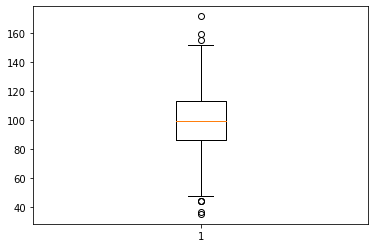

In [35]:
import matplotlib.pyplot as plt
plt.boxplot(data)

---

#### 기술 통계량 계산 함수 : describe()
* 관측값수, 범위, 평균, 분산, 왜도, 첨도 계산

In [36]:
describe(data)
# scipy.stats.describe
describe(df['english']) # 표본데이터의 기술 통계량

DescribeResult(nobs=1000, minmax=(35.37889984161376, 171.43158436052622), mean=99.20871727838417, variance=401.03130940853094, skewness=-0.029040113501245676, kurtosis=-0.02543852877769215)

DescribeResult(nobs=50, minmax=(37, 79), mean=58.38, variance=96.03632653061224, skewness=-0.31679325324962426, kurtosis=-0.38870454364589113)

In [37]:
# pandas
df['english'].describe()

count    50.00
mean     58.38
std       9.80
min      37.00
25%      54.00
50%      57.50
75%      65.00
max      79.00
Name: english, dtype: float64

In [38]:
describe(df['english'], ddof=0) # 모집단 데이터에 대한 기술 통계량

DescribeResult(nobs=50, minmax=(37, 79), mean=58.38, variance=94.1156, skewness=-0.31679325324962426, kurtosis=-0.38870454364589113)

---

<br>

### 2. 변이 통계량
* 데이터들이 얼마나 흩어져 있는가를 나타내는 것(산포도)
* 하나의 수치로 데이터가 흩어진 정도 계산
* 예시) 평균이 같은 A와 B반의 성적 : 두 집단이 동일한 집단일까?

In [39]:
import numpy as np
# numpy float 출력옵션 변경
# np.set_printoptions(precision=3)
# np.set_printoptions(precision=20, suppress=True)
# pd.options.display.float_format = '{:.2f}'.format
np.set_printoptions(formatter={'float_kind': lambda x: "{0:0.3f}".format(x)})

#### 범위(range)
* 데이터의 최대값 - 최소값
* 데이터가 퍼져 있는 정도를 나타내는 간단한 방법
* 범위가 클수록 산포가 크다고 하지만
* 중앙값처럼 극단적인 값에 영향을 받는다.
* 데이터 중 2개의 정보만을 이용하므로 적절한 척도로 사용키 어려움

##### 범위(R) = 최대값 - 최소값

In [40]:
np.random.seed(123)
data = np.random.normal(100, 20, size=1000)
data[:10]

array([78.287, 119.947, 105.660, 69.874, 88.428, 133.029, 51.466, 91.422,
       125.319, 82.665])

In [41]:
# numpy를 사용해 범위구하기
np.min(data), np.max(data)
np.max(data)-np.min(data)
# numpy ptp(a[,axis,out,keepdims]) 이용 범위 계산
np.ptp(data)

(35.37889984161376, 171.43158436052622)

136.05268451891246

136.05268451891246

##### 중간 범위
* 최대값과 최소값의 평균

In [42]:
# 중간 범위 계산
(np.max(data)+np.min(data))/2

103.40524210106999

##### 사분위간 범위(interquartile range: IQR)
* IQR =  Q3 - Q1

In [43]:
# numpy.quantile() 이용 IQR 계산
np.quantile(data, 0.75) - np.quantile(data, 0.25)
# scipy.stats.iqr(x[,axis, rng, scale, nan_policy, ...]) 이용
iqr(data)

27.06844676167337

27.06844676167337

##### 사분위수 편차(quartile deviation)
* 범위(range)의 문제점을 보완한 척도
* 사분위간 범위의 값을 2로 나눈 값으로 사분위 범위의 평균값

In [44]:
(np.quantile(data, 0.75) - np.quantile(data, 0.25))/2
iqr(data)/2

13.534223380836686

13.534223380836686

---

#### 편차(deviation)
* 자료값과 평균과의 차이
* xi-mean()

In [45]:
data-np.mean(data)

array([-20.921, 20.738, 6.451, -29.335, -10.781, 33.820, -47.742, -7.787,
       26.110, -16.544, -12.786, -1.103, 30.619, -11.987, -8.088, -7.896,
       44.910, 44.527, 20.872, 8.515, 15.539, 30.606, -17.925, 24.308,
       -24.286, -11.964, 18.933, -27.782, -2.010, -16.444, -4.321,
       -55.180, -34.639, -13.206, 19.341, -2.681, 0.848, 14.556, -16.799,
       6.464, -15.316, -33.762, -7.027, 12.267, 7.563, 0.555, 48.639,
       9.050, 20.366, 45.554, -25.090, -19.984, 35.666, -15.170, 1.385,
       22.178, 18.605, 35.889, 30.704, 22.179, -14.663, 16.689, 7.077,
       -25.734, 29.137, 16.936, 1.701, -3.871, -23.175, 4.782, 10.160,
       -15.832, 24.035, -21.153, -41.671, 21.586, -7.276, -1.729, -15.959,
       -31.328, 25.896, -12.986, 34.010, 16.937, -5.504, -20.927, -13.858,
       -23.459, 42.534, 4.080, 23.795, -24.556, 4.412, 24.349, -5.909,
       21.414, -20.900, -26.478, 8.379, -6.792, 13.632, -38.766, 15.037,
       52.757, 0.299, 1.474, 4.382, -36.448, 9.314, -31.317, -

In [46]:
# 편차의 합은 항상 0
(data-np.mean(data)).sum()
# 거의 0

-7.815970093361102e-12

---

#### 분산(variaince)
* 산포도의 척도로 가장 널리 사용
* 평균을 중심으로 데이터가 퍼져있는 정도
* 각 데이터와 평균과의 차이를 제곱하여 합한 값의 평균
    * 모분산 : n으로 나누어 줌
    * 표본분산 : n-1로 나누어 줌

##### 분산 계산 :  var(a, ddof=0)
* numpy.var(a[, axis, dtype, out, ddof, keepdims, where])
* pandas.Series.var(axis=None, skipna=None, level=None, ddof=1, numeric_only=None, **kwargs)
* ddof :디폴트= 0(모분산), 1(표본분산)

In [47]:
x = [1,2,3,4,5]

# 표본 분산(모분산보다 항상 크게나온다.)
np.var(x, ddof =1) # ddof=1 표본분산
pd.Series(x).var(ddof=1)
# 모분산
np.var(x, ddof = 0) # ddof=0 모분산
# 모분산
np.array(x).var()
pd.Series(x).var(ddof =0)

2.5

2.500

2.0

2.0

2.000

---

#### 표준 편차(standard deviation)
* 계산된 분산의 제곱근으로 계산
* 모든 데이터가 동일한 값을 갖는다면 분산과 표준편차는 0으로 계산
* 모든 데이터에 동일값을 더해주거나 빼도 변하지 않음

##### 표준편차 계산 : std(a, ddof=0)
* 데이터의 단위와 동이랗게 만듬
* numpy.std(a[, axis, dtype, out, ddof, keepdims, where])
* pandas.Series.std(axis=None, skipna=None, level=None, ddof=1, numeric_only=None, **kwargs)
* ddof :디폴트= 0(모분산), 1(표본분산)

In [48]:
x = [1,2,3,4,5]

# 표본 표준편차 (S)
np.std(x, ddof =1) # ddof=1 표본 표준편차
pd.Series(x).std(ddof=1)
# 모표준편차 (sigma)
np.std(x, ddof = 0) # ddof=0 모 표준편차
# 모표준편차
np.array(x).std()
pd.Series(x).std(ddof =0)

1.5811388300841898

1.581

1.4142135623730951

1.4142135623730951

1.414

---

#### 변동계수(CV: Coefficient of Variable)
* 표본 표준편차를 표본평균으로 나눈 값 또는 100을 곱한 값
* 상대 표준편차
* 서로 다른 평균과 표준편차를 갖는 여러 데이터의 흩어진 정도를 비교할 때 사용
* 변동계수 값이 크다는 것은 데이터의 흩어진 정도가 상대적으로 크다는 의미

##### 변동계수 계산
* 편차를 평균으로 나눔
* scipy.stats.variation(a, axis=0, nan_policy='propagate', ddof=0,*,keepdims=False)
* np.std(x, axis=axis, ddof=ddof)/np.mean(x)

In [49]:
men = [72,74,77,68,66,75]
women = [45,48,52,53,46,50]

print('평균')
np.mean(men)
np.mean(women)
print('표본 표준편차')
np.std(men, ddof=1)
np.std(women, ddof=1)

평균


72.0

49.0

표본 표준편차


4.242640687119285

3.22490309931942

In [50]:
# np.std(x, axis=axis, ddof=ddof) / np.mean(x)
print('남자 변동계수(CV):',np.std(men, ddof=1)/np.mean(men))
print('여자 변동계수(CV):',np.std(women, ddof=1)/np.mean(women))

남자 변동계수(CV): 0.05892556509887895
여자 변동계수(CV): 0.06581434896570246


In [51]:
# scipy.stats.variation
print('남자 변동계수(CV):',variation(men))
print('남자 변동계수(CV):',variation(women))

남자 변동계수(CV): 0.053791435363991905
남자 변동계수(CV): 0.06008000589338671


---

#### 데이터의 정규화
: scaling(표준화)
* 각 값들을 상대적인 값으로 변화시키는 기법
* 예시) 국어 평균 95, 수학 평균 30 : 취득점수 국어 90, 수학 80이라면 어떤 과목을 더 잘한건가?

1. standard scaling(Z)
2. min-max scaling

#####  예제

In [52]:
df = pd.read_csv('./data/ch2_scores_em.csv',
                index_col = 'student number')
df.head()

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


In [53]:
df['english'].describe() # 데이터 정보 describe()

count    50.00
mean     58.38
std       9.80
min      37.00
25%      54.00
50%      57.50
75%      65.00
max      79.00
Name: english, dtype: float64

In [54]:
df['mathematics'].describe()

count    50.000
mean     78.880
std       8.414
min      57.000
25%      76.000
50%      80.000
75%      84.000
max      94.000
Name: mathematics, dtype: float64

In [55]:
df.describe()

,english,mathematics
count,50.00,50.000
mean,58.38,78.880
std,9.80,8.414
min,37.00,57.000
25%,54.00,76.000
50%,57.50,80.000
75%,65.00,84.000
max,79.00,94.000


##### Z-scaling
: 평균은 0, 표준편차가 1이 된다.

In [56]:
z1 = (df['english']-df['english'].mean())/df['english'].std()
z2 = (df['mathematics']-df['mathematics'].mean())/df['mathematics'].std()

print(z1.min(), z1.max())
print(z2.min(), z2.max())
# -3 ~ 3 사이의 값으로 분포된다.

-2.1816743772942324 2.104121873704727
-2.600313324789425 1.796925844187209


In [57]:
z1.mean(), z1.std()

(-0.000, 1.000)

##### min-max scaling

In [58]:
s1 = (df['english']-df['english'].min())/(df['english'].max() - df['english'].min())
s2 = (df['mathematics']-df['mathematics'].min())/(df['mathematics'].max() - df['mathematics'].min())
print('eng :', s1.min(), s1.max())
print('math :', s2.min(), s2.max())                                                 
                                            

eng : 0.0 1.0
math : 0.0 1.0


##### sklearn.preprocessing.MinMaxScaler
* 머신러닝에서 많이 쓴다
* df의 각 열에 대해서 스케일링하는데 적합

In [59]:
df.head()

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


In [60]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
S = scaler.fit_transform(df)
pd.DataFrame(S, columns=df.columns, index=df.index).head()

,english,mathematics
student number,,
1,0.119,0.216
2,0.762,0.622
3,0.452,0.162
4,0.095,0.162
5,0.476,0.514


---

<br>

### 3. 모양 통계량
* 왜도, 첨도

#### 왜도(skewness)
* 데이터의 비대칭도
* 분포 모양이 대표값(평균)을 중심으로 좌우의 모양이 대칭적인가 아닌가 측정
* 데이터가 어디로 쳐져있는지를 나타낸다.
* 왜도가 0에 가까운 값을 가지면 분포의 모양은 좌우 대칭
* 왜도가 음수면 오른쪽으로 치우친(왼쪽 꼬리분포) 모양

##### 왜도 계산
* 분포의 비대칭도
* 왜도가 0이면 정규분포
* 왜도의 절대값이 1.5 이상일시에 많이 치우쳤다고 판단한다.
* scipy.stats.skew(a[,axis,bias,nan_policy])

In [61]:
from matplotlib import pyplot as plt
%matplotlib inline

# 오른쪽으로 꼬리가 긴분포(right skwed, positive)
x1 = [1] * 30 + [2] * 20 + [3] * 20 + [4] * 15 + [5] * 15

# 좌우 대칭 분포
x2 = [1] * 15 + [2] * 20 + [3] * 30 + [4] * 20 + [5] * 15

# 왼쪽으로 꼬리가 긴분포(left skwed, negative)
x3 = [1] * 15 + [2] * 15 + [3] * 20 + [4] * 20 + [5] * 30

In [62]:
x1[:10]

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [63]:
pd.Series(x1).value_counts(sort=False)

1    30
2    20
3    20
4    15
5    15
dtype: int64

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

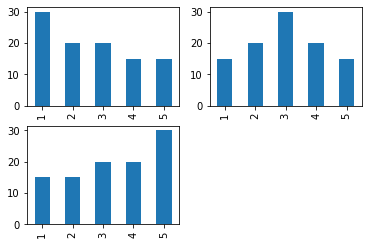

In [64]:
plt.subplot(221)
pd.Series(x1).value_counts(sort=False).plot(kind='bar')
plt.subplot(222)
pd.Series(x2).value_counts(sort=False).plot(kind='bar')
plt.subplot(223)
pd.Series(x3).value_counts(sort=False).plot(kind='bar')
plt.show()

In [65]:
print('오른쪽으로 꼬리가 긴 분포의 왜도:',skew(x1))
print('좌우 대칭 분포 왜도:',skew(x2))
print('온쪽으로 꼬리가 긴 분포의 왜도:',skew(x3))

오른쪽으로 꼬리가 긴 분포의 왜도: 0.3192801008486361
좌우 대칭 분포 왜도: 0.0
온쪽으로 꼬리가 긴 분포의 왜도: -0.31928010084863606


#### 첨도(kurtosis)
* 데이터의 뾰족한 정도
* 분포가 대표값을 중심으로 얼마나 모여 있는가를 나타냄
* 정규 분포(첨도=3)를 기준으로
    * 대표값을 중심으로 상당히 몰려있다면 분포 가운데 모양이 뾰족한 모양(첨도>3)
    * 대표값을 중심으로 좌우에 퍼져있다면 가운데 모양은 완만(첨도<3)

##### 첨도 계산
* scipy.stats.kurtosis(a[,axis,fisher,bias,nan_policy])
* 정규분포에 가까울수록 0

In [66]:
# 균일분포(unifrom dist.)
x1 = [1] * 20 + [2] * 20 + [3] * 20 + [4] * 20 + [5] * 20

# 좌우 대칭 분포(정규분포에 가까움: 뭉툭함)
x2 = [1] * 10 + [2] * 20 + [3] * 40 + [4] * 20 + [5] * 10

# 뾰족한 분포
x3 = [1] * 5 + [2] * 15 + [3] * 60 + [4] * 15 + [5] * 5

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

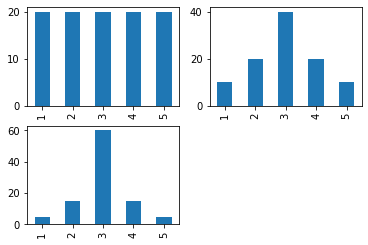

In [67]:
plt.subplot(221)
pd.Series(x1).value_counts(sort=False).plot(kind='bar')
plt.subplot(222)
pd.Series(x2).value_counts(sort=False).plot(kind='bar')
plt.subplot(223)
pd.Series(x3).value_counts(sort=False).plot(kind='bar')

In [68]:
print('전혀 뾰족 X (평평) 첨도:',kurtosis(x1))
print('조금 뾰족할 때 첨도:',kurtosis(x2))
print('매우 뾰족할 때 첨도:',kurtosis(x3)) # 뾰족하면 첨도가 높아짐

전혀 뾰족 X (평평) 첨도: -1.3
조금 뾰족할 때 첨도: -0.5
매우 뾰족할 때 첨도: 0.8775510204081636


---

<br>

### 4. 데이터 시각화
* 참고 : [https://blog.qlik.com/third-pillar-of-mapping-data-to-visualizations-usage](https://blog.qlik.com/third-pillar-of-mapping-data-to-visualizations-usage
)

* 수치형 데이터
    * 일변량 : 도수분포표, 상자그림, 히스토그램
    * 이변량 : 산점도, 선그래프
    * 다변량 : 산점도행렬, 방사선차트, 평행좌표
* 범주형 데이터
    * 일변량 : 빈도표, 파이차트, 막대차트
    * 이변량 : 교차표, 스택트컬럼차트
    * 다변량 : 모자익플롯

In [69]:
import numpy as np
import pandas as pd
from scipy.stats import *

#### 도수 분포표란?
* 분할된 구간과 데이터의 개수를 표로 정리

In [70]:
df = pd.read_csv('./data/ch2_scores_em.csv',
                index_col = 'student number')
df.head()

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


In [71]:
# 50명의 영어 점수 array
eng = df['english']
# Series로 변환하여 describe 표시
eng.describe()

count    50.00
mean     58.38
std       9.80
min      37.00
25%      54.00
50%      57.50
75%      65.00
max      79.00
Name: english, dtype: float64

In [72]:
freq, _ = np.histogram(eng, bins=10, range = (0,100))
freq

array([ 0,  0,  0,  2,  8, 16, 18,  6,  0,  0], dtype=int64)

In [73]:
# 0~10, 10~20, ... 
freq_class = list(f'{i} ~ {i+10}' for i in range(0,100,10))

# freq_class를 인덱스로 dataframe을 작성
freq_dist_df = pd.DataFrame({'frequency':freq}, 
                           index = pd.Index(freq_class, name='class'))
freq_dist_df

,frequency
class,
0 ~ 10,0
10 ~ 20,0
20 ~ 30,0
30 ~ 40,2
40 ~ 50,8
50 ~ 60,16
60 ~ 70,18
70 ~ 80,6
80 ~ 90,0


#### 계급값
* 각 계급을 대표하는 값으로 계급의 중앙값이 이용
* 60~70의 계급이면 계급값 = 65

In [74]:
class_value = [(i+(i+10))//2 for i in range(0,100,10)]
class_value

[5, 15, 25, 35, 45, 55, 65, 75, 85, 95]

##### 상대도수
* 전체 데이터에 대해서 해당 계급의 데이터가 어느 정도 비율을 차지하고 있는지를 나타냄

In [75]:
rel_freq = freq/freq.sum()
rel_freq

array([0.000, 0.000, 0.000, 0.040, 0.160, 0.320, 0.360, 0.120, 0.000,
       0.000])

##### 누적 상대도수
* 해당 계급까지의 상대도수의 합
* 누적합 : np.cumsum()

In [76]:
cum_rel_freq = np.cumsum(rel_freq)
cum_rel_freq

array([0.000, 0.000, 0.000, 0.040, 0.200, 0.520, 0.880, 1.000, 1.000,
       1.000])

In [77]:
# 도수 분포표 확장
freq_dist_df['class value'] = class_value
freq_dist_df['relative frequency'] = rel_freq
freq_dist_df['cum. relative freq.'] = cum_rel_freq
freq_dist_df

,frequency,class value,relative frequency,cum. relative freq.
class,,,,
0 ~ 10,0,5,0.00,0.00
10 ~ 20,0,15,0.00,0.00
20 ~ 30,0,25,0.00,0.00
30 ~ 40,2,35,0.04,0.04
40 ~ 50,8,45,0.16,0.20
50 ~ 60,16,55,0.32,0.52
60 ~ 70,18,65,0.36,0.88
70 ~ 80,6,75,0.12,1.00
80 ~ 90,0,85,0.00,1.00


#### 도수 분포표의 최빈값

In [78]:
import pandas as pd

dataframe=pd.DataFrame({'Attendance': {0: 60, 1: 100, 2: 80,3: 78,4: 95},
                        'Obtained Marks': {0: 90, 1: 75, 2: 82, 3: 64, 4: 45}})
dataframe

,Attendance,Obtained Marks
0,60,90
1,100,75
2,80,82
3,78,64
4,95,45


In [79]:
series = dataframe.idxmax()
series

Attendance        1
Obtained Marks    0
dtype: int64

In [80]:
series = dataframe.idxmin()
series

Attendance        0
Obtained Marks    4
dtype: int64

In [81]:
freq_dist_df.loc[freq_dist_df['frequency'].idxmax(), 'class value']

65

##### 백분위수 및 사분위수 계산

In [82]:
x = np.arange(1,12,1)
x

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [83]:
print(np.percentile(x, 10)) # 백분위수
print(np.quantile(x, 0.1)) # 0 ~ 1 사이의 값으로 입력

2.0
2.0


In [84]:
print(np.percentile(x, 25)) # 25%
print(np.quantile(x, 0.25)) # 하사분위수

3.5
3.5


#### 히스토그램

In [85]:
import matplotlib.pyplot as plt

<AxesSubplot:>

(array([0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000,
        2.000, 3.000, 3.000, 3.000, 7.000, 8.000, 6.000, 10.000, 5.000,
        2.000, 1.000, 0.000, 0.000, 0.000, 0.000, 0.000]),
 array([0.000, 4.000, 8.000, 12.000, 16.000, 20.000, 24.000, 28.000,
        32.000, 36.000, 40.000, 44.000, 48.000, 52.000, 56.000, 60.000,
        64.000, 68.000, 72.000, 76.000, 80.000, 84.000, 88.000, 92.000,
        96.000, 100.000]),
 <BarContainer object of 25 artists>)

<AxesSubplot:>

(array([0.000, 0.000, 0.000, 0.000, 0.000, 2.000, 4.000, 6.000, 14.000,
        15.000, 7.000, 2.000, 0.000, 0.000, 0.000]),
 array([0.000, 6.667, 13.333, 20.000, 26.667, 33.333, 40.000, 46.667,
        53.333, 60.000, 66.667, 73.333, 80.000, 86.667, 93.333, 100.000]),
 <BarContainer object of 15 artists>)

<AxesSubplot:>

(array([0.000, 0.000, 0.000, 2.000, 8.000, 16.000, 18.000, 6.000, 0.000,
        0.000]),
 array([0.000, 10.000, 20.000, 30.000, 40.000, 50.000, 60.000, 70.000,
        80.000, 90.000, 100.000]),
 <BarContainer object of 10 artists>)

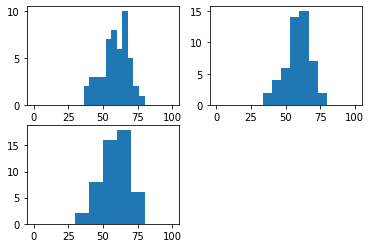

In [86]:
plt.subplot(221)
plt.hist(eng, bins=25, range=(0,100))
plt.subplot(222)
plt.hist(eng, bins=15, range=(0,100))
plt.subplot(223)
plt.hist(eng, bins=10, range=(0,100))
plt.show()

#### 상자그림
* 장점
    1. 분포 모양 : 왜도-비대칭/대칭
    2. 이상치

{'whiskers': [<matplotlib.lines.Line2D at 0x1b9091ac940>,
 'caps': [<matplotlib.lines.Line2D at 0x1b9091af5e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b9091ac070>],
 'medians': [<matplotlib.lines.Line2D at 0x1b909166250>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b9091666a0>],
 'means': []}

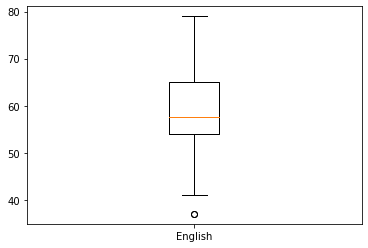

In [87]:
plt.boxplot(eng, labels=['English'])
plt.show()

---

<br>

## 2차원 데이터의 정리

### 두 데이터 사이의 관계를 나타내는 지표

In [88]:
import numpy as np
import pandas as pd

%precision 3
pd.set_option('precision', 3)

'%.3f'

#### 두 변수 사이의 관계 측도
* 수치형 변수간의 관계 : Pearson's correalation
* 순서형 변수간의 관계 : Kendall's tau, Spearman correlation
* 범주형 변수간의 관계 : 카이제곱검정 - Phi correlation

#### 두 변수간의 관계 시각화
* 범주형 변수간의 관계 시각화: 모자익플롯(Mosaic plot)
* 수치형 변수간의 관계 시각화 : 선점도(Scatter plot)

##### 예제

In [89]:
df = pd.read_csv('./data/ch2_scores_em.csv',
                 index_col='student number')
df.head()

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


Text(0.5, 0, 'english score')

Text(0, 0.5, 'mathematics score')

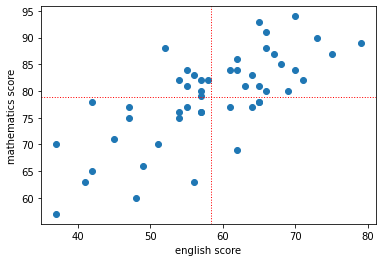

In [90]:
import matplotlib.pyplot as plt

plt.scatter(df['english'], df['mathematics'])
plt.xlabel('english score')
plt.ylabel('mathematics score')

plt.axhline(y=df['mathematics'].mean(), color='r',
            linewidth=1,linestyle=':')
plt.axvline(x=df['english'].mean(), color='r',
            linewidth=1,linestyle=':')
plt.show()

### 공분산(covariance)
* 두 변수 사이의 관계성 척도
* 공분산은 면적, 음의 면적도 가능(음의 상관)

In [91]:
# 각 과목의 편차 및 과목간 공분산

summary_df = df.copy()
summary_df['eng_dev.'] =\
    summary_df['english'] - summary_df['english'].mean()
summary_df['math_dev.'] =\
    summary_df['mathematics'] - summary_df['mathematics'].mean()
summary_df['productOfDev.'] =\
    summary_df['eng_dev.'] * summary_df['math_dev.']
summary_df.head()

,english,mathematics,eng_dev.,math_dev.,productOfDev.
student number,,,,,
1,42,65,-16.38,-13.88,227.354
2,69,80,10.62,1.12,11.894
3,56,63,-2.38,-15.88,37.794
4,41,63,-17.38,-15.88,275.994
5,57,76,-1.38,-2.88,3.974


In [92]:
summary_df['productOfDev.'].mean()
# 각 학생별 영어와 수학의 공분산 평균이 58.49 이므로 영어와 수학은 양의 상관 관계에 있다.

58.486

#### numpy의 공분산 함수 : cov(data1, data2, ddof=)
* 반환값  : 공분산 행렬
* 반환 행렬 중 [0,1]과 [1,0]의 원소가 공분산 값
* (영어,영어   영어,수학)
* (수학,영어   수학,수학)

In [93]:
cov_mat = np.cov(df['english'],df['mathematics'], ddof=0) # ddof=0 (모집단)
cov_mat

array([[94.116, 58.486],
       [58.486, 69.386]])

In [94]:
cov_mat[0,1], cov_mat[1,0]

(58.4856, 58.4856)

#### 각 과목의 분산

In [95]:
cov_mat[0,0] # 영어과목의 분산

94.11560000000001

In [96]:
cov_mat[1,1] # 수학과목의 분산

69.38559999999995

In [97]:
np.var(df['english'], ddof=0), np.var(df['mathematics'], ddof=0)

(94.116, 69.386)

### 상관계수
* 공분산은 단위의 제곱으로 표현되어 직관적으로 이해하기 어렵다.
    * 시험 점수 간의 공분산 (점수X점수), 키와 점수간의 공분산(cm X 점수)
   
* 단위에 의존하지 않는 상관성을 나타내는 지표
* 상관계수는 공분산을 각 데이터의 표준편차로 나누어 단위에 의존 X
* 양의 상관은 1, 음의 상관은 -1에 가까워진다. 무상관은 0
* 상관계수가 -1, 1 일때는 데이터가 완전히 직선상에 놓임

In [98]:
# 수식으로 상관계수 계산

np.cov(df['english'], df['mathematics'], ddof=0)[0, 1] /\
    (np.std(df['english']) * np.std(df['mathematics']))

0.7237414863069244

#### np.corrcoef(x,y) / df.corr()

In [99]:
np.corrcoef(df['english'], df['mathematics'])

array([[1.000, 0.724],
       [0.724, 1.000]])

#### pandas.DataFrame.corr()

In [100]:
df.corr()

,english,mathematics
english,1.000,0.724
mathematics,0.724,1.000


---

### 2차원 데이터의 시각화

#### 산점도

In [101]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 0, 'english')

Text(0, 0.5, 'mathematics')

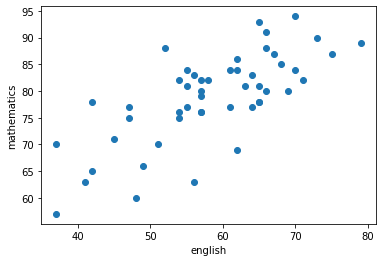

In [102]:
# 산점도
plt.scatter(df['english'],df['mathematics'] )
plt.xlabel('english')
plt.ylabel('mathematics')
plt.show()

#### 회귀직선

Text(0.5, 0, 'english')

Text(0, 0.5, 'mathematics')

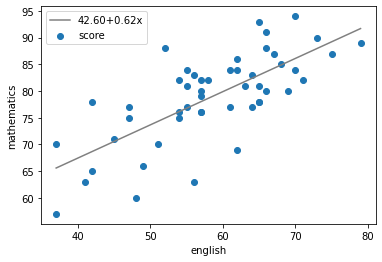

In [103]:
# 계수β_0와β_1를 구한다(기울기와 절편)
poly_fit = np.polyfit(df['english'],df['mathematics'], 1)

# β_0+β_1 x를 반환하는 함수를 작성
poly_1d = np.poly1d(poly_fit)

# 직선을 그리기 위한 x좌표
xs = np.linspace(df['english'].min(), df['english'].max())

# xs에 대응하는 y좌표
ys = poly_1d(xs)

plt.xlabel('english')
plt.ylabel('mathematics')
plt.scatter(df['english'],df['mathematics'], label='score')
plt.plot(xs, ys, color='gray',
        label=f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x')

# 범례의 표시
plt.legend(loc='upper left')

plt.show()

#### 히트맵
* 히스토그램의 2차원 버전, 색을 사용
* 영어 점수 35 ~ 80점, 수학 점수 55 ~ 95점까지 5점 간격

Text(0.5, 0, 'english')

Text(0, 0.5, 'mathematics')

([<matplotlib.axis.XTick at 0x1b90924f6a0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

([<matplotlib.axis.YTick at 0x1b909963310>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

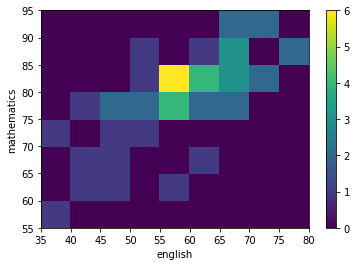

In [104]:
c = plt.hist2d(df['english'], df['mathematics'],
          bins=(9, 8), range=[(35,80),(55,95)])
c[3]

plt.xlabel('english')
plt.ylabel('mathematics')
plt.xticks(c[1])
plt.yticks(c[2])

plt.colorbar(c[3])
plt.show()